In [1]:
import math

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import wrangle as wr
import split_scale as ss
import explore as ex
import evaluate as ev
import feature_engineering as fe

In [2]:
df = wr.wrangle_grades()
df

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97
...,...,...,...,...
99,70,65,78,77
100,62,70,79,70
101,58,65,70,68
102,57,65,75,65


### 1. Split the data into train and test datasets.

In [3]:
train, test = ss.split_my_data(df)

In [4]:
train.shape

(81, 4)

In [5]:
test.shape

(21, 4)

### 2. Create a model that uses exam 1 to predict the final grade.

In [6]:
predictions = pd.DataFrame({
    "final_grade": train.final_grade
})
predictions.head()

,final_grade
78,96
37,65
38,72
25,72
103,72


In [7]:
# X must be 2-d
X = train[["exam1"]]
# y can be 1-2
y = train.final_grade

In [8]:
# 1. Make the object
lm = sklearn.linear_model.LinearRegression()
# 2. Fit the object
lm.fit(X, y)
# 3. Use the object
predictions["simple_lm_exam1"] = lm.predict(X)
predictions.head()

,final_grade,simple_lm_exam1
78,96,97.833265
37,65,65.436309
38,72,75.230737
25,72,75.230737
103,72,75.230737


In [9]:
lm.coef_, lm.intercept_

(array([0.75341758]), 22.491506884667395)

In [10]:
print(f"final_grade = {lm.coef_[0]:.3f} * exam1 + {lm.intercept_:.3f}")

final_grade = 0.753 * exam1 + 22.492


- Visualize the actual vs the predicted values. Create a seperate visualization for each model.

In [11]:
x_pred = np.array([-25, 100]).reshape(-1, 1)
y_pred = lm.predict(x_pred)

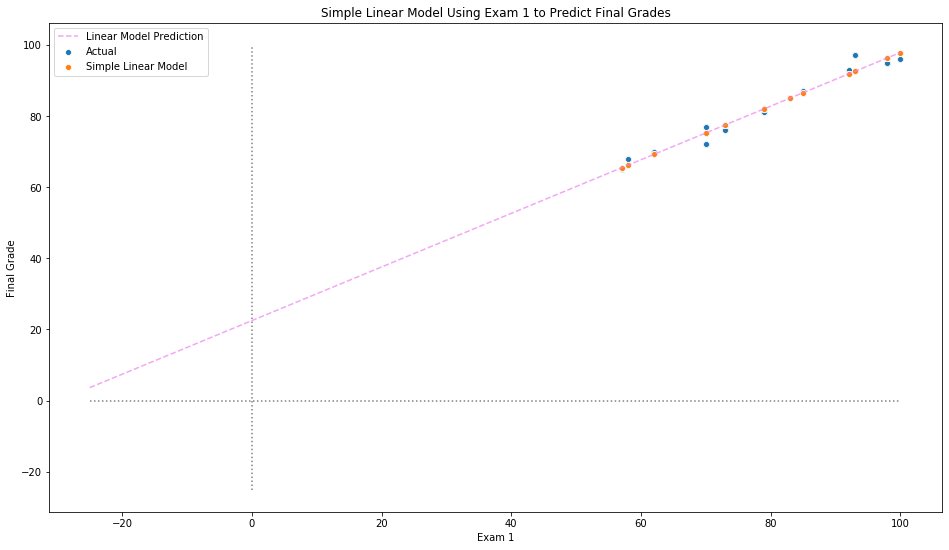

In [12]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x=train.exam1, y=train.final_grade, label="Actual")
sns.scatterplot(x=train.exam1, y=predictions.simple_lm_exam1, label="Simple Linear Model")
plt.plot(x_pred, y_pred, ls="--", c="violet", label="Linear Model Prediction", alpha=.7)
plt.hlines(0, -25, 100, ls=":", color="grey")
plt.vlines(0, -25, 100, ls=":", color="grey")

plt.title("Simple Linear Model Using Exam 1 to Predict Final Grades")
plt.xlabel("Exam 1")
plt.ylabel("Final Grade")
plt.legend()
plt.show()

### 3. Create a model that uses exam 2 to predict the final grade.

In [13]:
X = train[["exam2"]]

In [14]:
# 1. Make the object
lm = sklearn.linear_model.LinearRegression()
# 2. Fit the object
lm.fit(X, y)
# 3. Use the object
predictions["simple_lm_exam2"] = lm.predict(X)
predictions.head()

,final_grade,simple_lm_exam1,simple_lm_exam2
78,96,97.833265,93.986763
37,65,65.436309,69.592372
38,72,75.230737,79.350128
25,72,75.230737,79.350128
103,72,75.230737,79.350128


In [15]:
lm.coef_, lm.intercept_

(array([0.97577564]), 6.1669553551717655)

In [16]:
print(f"final_grade = {lm.coef_[0]:.3f} * exam1 + {lm.intercept_:.3f}")

final_grade = 0.976 * exam1 + 6.167


- Visualize the actual vs the predicted values. Create a seperate visualization for each model.

In [17]:
x_pred = np.array([-25, 100]).reshape(-1, 1)
y_pred = lm.predict(x_pred)

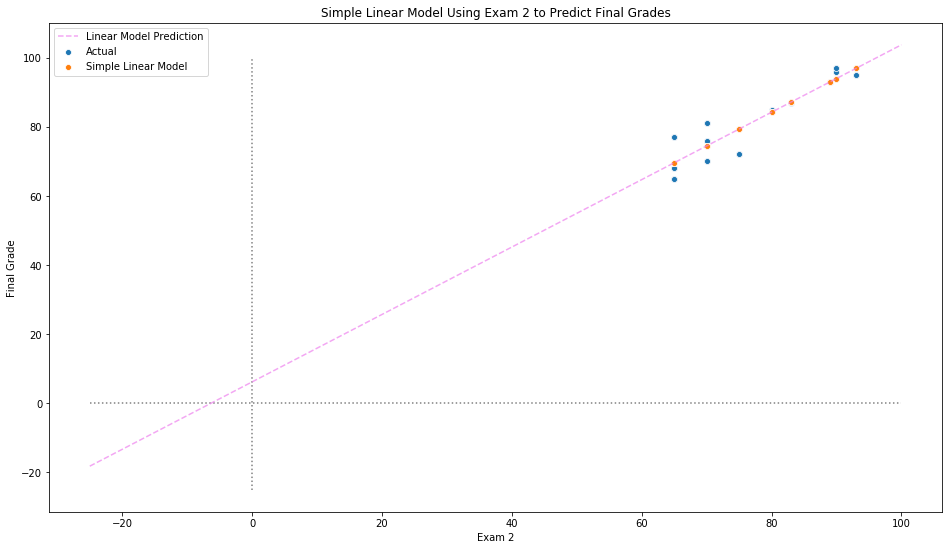

In [18]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x=train.exam2, y=train.final_grade, label="Actual")
sns.scatterplot(x=train.exam2, y=predictions.simple_lm_exam2, label="Simple Linear Model")
plt.plot(x_pred, y_pred, ls="--", c="violet", label="Linear Model Prediction", alpha=.7)
plt.hlines(0, -25, 100, ls=":", color="grey")
plt.vlines(0, -25, 100, ls=":", color="grey")

plt.title("Simple Linear Model Using Exam 2 to Predict Final Grades")
plt.xlabel("Exam 2")
plt.ylabel("Final Grade")
plt.legend()
plt.show()

### 4. Compare your models in the following manner:
- Calculate the mean squared error

In [19]:
mse = ev.regression_errors(predictions.final_grade, predictions.simple_lm_exam1, predictions)["MSE"]

In [20]:
rmse = math.sqrt(mse)
rmse

1.921253283425898

In [21]:
mse = ev.regression_errors(predictions.final_grade, predictions.simple_lm_exam2, predictions)["MSE"]

In [22]:
rmse = math.sqrt(mse)
rmse

4.057867641906592

- Visualize the residuals. Create a seperate visualization for each model.

In [23]:
predictions["baseline"] = train.final_grade.mean()
predictions

,final_grade,simple_lm_exam1,simple_lm_exam2,baseline
78,96,97.833265,93.986763,81.518519
37,65,65.436309,69.592372,81.518519
38,72,75.230737,79.350128,81.518519
25,72,75.230737,79.350128,81.518519
103,72,75.230737,79.350128,81.518519
...,...,...,...,...
36,68,66.189726,69.592372,81.518519
66,95,96.326429,96.914090,81.518519
17,97,92.559342,93.986763,81.518519
102,65,65.436309,69.592372,81.518519


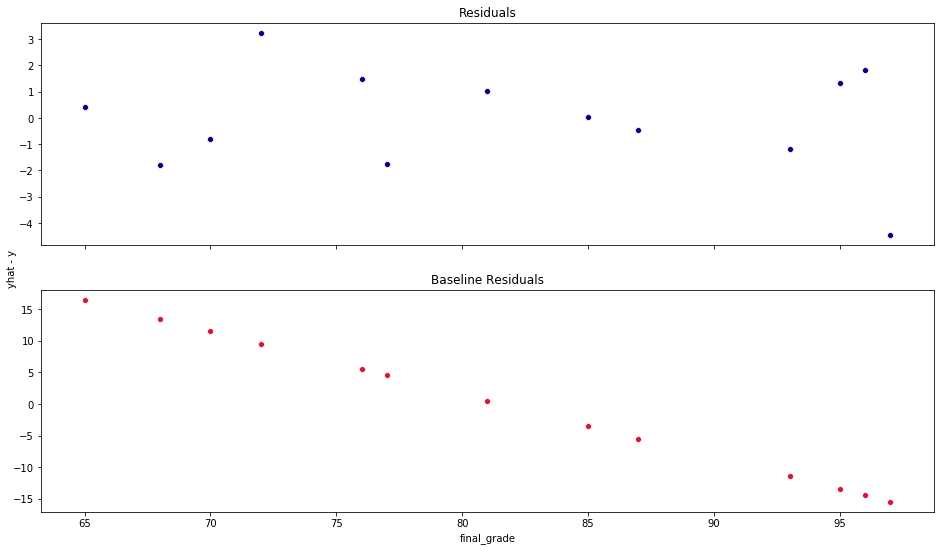

In [24]:
ev.plot_residuals(predictions.final_grade, predictions.simple_lm_exam1, predictions.baseline, predictions)

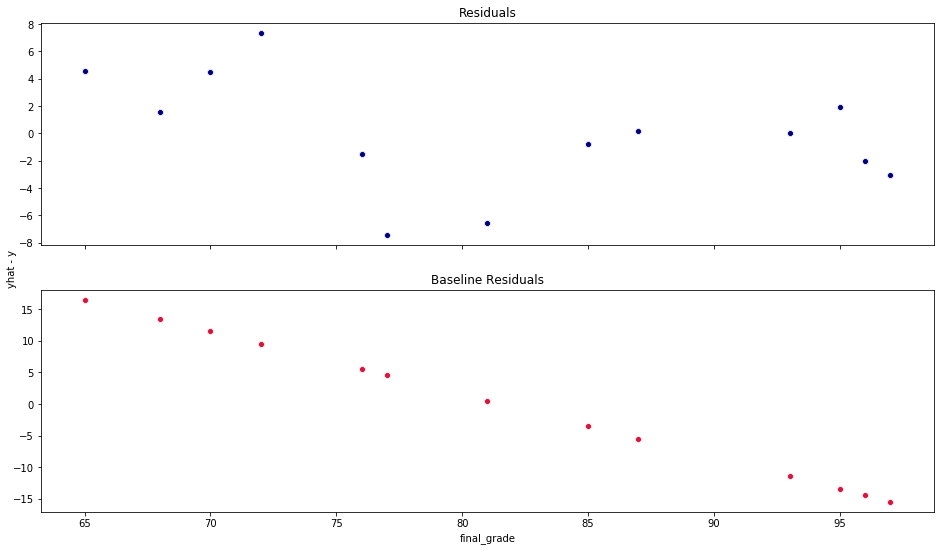

In [25]:
ev.plot_residuals(predictions.final_grade, predictions.simple_lm_exam2, predictions.baseline, predictions)

- **Bonus**: Combine the seperate visualizations for each model into a single visualization. Is this visual helpful?

### 5. Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your previous ones?

In [26]:
X = train[["exam1", "exam3"]]

In [27]:
# 1. Make the object
lm = sklearn.linear_model.LinearRegression()
# 2. Fit the object
lm.fit(X, y)
# 3. Use the object
predictions["multiple_lm"] = lm.predict(X)
predictions.head()

,final_grade,simple_lm_exam1,simple_lm_exam2,baseline,multiple_lm
78,96,97.833265,93.986763,81.518519,97.329402
37,65,65.436309,69.592372,81.518519,66.487563
38,72,75.230737,79.350128,81.518519,74.952382
25,72,75.230737,79.350128,81.518519,74.952382
103,72,75.230737,79.350128,81.518519,74.952382


In [28]:
mse = ev.regression_errors(predictions.final_grade, predictions.multiple_lm, predictions)["MSE"]
mse

3.1254990433663594

In [29]:
rmse = math.sqrt(mse)
rmse

1.7679080981109734

In [30]:
lm.coef_, lm.intercept_

(array([0.58603708, 0.28211223]), 11.925032759024475)

In [31]:
print(f"final_grade = {lm.coef_[0]:.3f} * exam1 + {lm.coef_[1]:.3f} * exam3 + {lm.intercept_:.3f}")

final_grade = 0.586 * exam1 + 0.282 * exam3 + 11.925


### 6. Take your best preforming model and measure its performance on the test data set. How does performance differ between train and test?

In [32]:
X_test = test[["exam1", "exam3"]]

test["yhat"] = lm.predict(X_test)
test

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,exam1,exam2,exam3,final_grade,yhat
48,62,70,79,70,70.546198
10,58,65,70,68,65.663039
0,100,90,95,96,97.329402
61,62,70,79,70,70.546198
100,62,70,79,70,70.546198
65,100,90,95,96,97.329402
4,93,90,96,97,93.509255
28,85,83,87,87,86.281948
80,85,83,87,87,86.281948
6,92,89,94,93,92.358994


In [33]:
mse = ev.regression_errors(test.final_grade, test.yhat, test)["MSE"]
mse

2.805751791214749

In [34]:
rmse = math.sqrt(mse)
rmse

1.6750378476962093

---
### 1. Run all your previous scripts that acquired, prepared, split, and scaled the telco churn data.

In [35]:
df = wr.wrangle_telco()
df

/Users/alechartman/codeup-data-science/ds-methodologies-exercises/regression/wrangle.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_charges"] = df.total_charges.astype("float")


,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40
1691,9972-EWRJS,19.25,67,1372.90
1692,9975-GPKZU,19.75,46,856.50
1693,9993-LHIEB,67.85,67,4627.65


In [36]:
df.drop(columns="customer_id", inplace=True)
df

,monthly_charges,tenure,total_charges
0,109.70,71,7904.25
1,84.65,63,5377.80
2,90.45,65,5957.90
3,45.20,54,2460.55
4,116.80,72,8456.75
...,...,...,...
1690,24.40,71,1725.40
1691,19.25,67,1372.90
1692,19.75,46,856.50
1693,67.85,67,4627.65


In [37]:
train, test = ss.split_my_data(df)

In [38]:
train.shape

(1348, 3)

In [39]:
test.shape

(337, 3)

In [40]:
X_train = train[["monthly_charges", "tenure"]]
X_test = test[["monthly_charges", "tenure"]]
y_train = train[["total_charges"]]
y_test = test[["total_charges"]]

In [41]:
# scaler, X_train_scaled, X_test_scaled = ss.min_max_scaler(X_train, X_test)


In [42]:
# scaler

In [43]:
# X_train_scaled.head()

In [44]:
# X_test_scaled.head()

### 2. Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.

In [45]:
predictions = pd.DataFrame({
    "total_charges": train.total_charges
})
predictions

,total_charges
893,6293.75
324,1292.65
1237,159.35
421,5638.30
793,828.85
...,...
1268,5589.45
1452,746.05
1225,1297.35
400,6310.90


In [46]:
X = train[["tenure"]]
y = train.total_charges

# 1. Make the object
lm = sklearn.linear_model.LinearRegression()
# 2. Fit the object
lm.fit(X, y)
# 3. Use the object
predictions["yhat_tenure"] = lm.predict(X)
predictions.head()

,total_charges,yhat_tenure
893,6293.75,5005.008813
324,1292.65,4730.447173
1237,159.35,-760.785644
421,5638.30,4089.803344
793,828.85,2350.912952


In [47]:
lm.coef_, lm.intercept_

(array([91.52054695]), -1492.9500199633858)

In [48]:
print(f"total_charges = {lm.coef_[0]:.3f} * tenure + {lm.intercept_:.3f}")

total_charges = 91.521 * tenure + -1492.950


In [49]:
X = train[["monthly_charges"]]
y = train.total_charges

# 1. Make the object
lm = sklearn.linear_model.LinearRegression()
# 2. Fit the object
lm.fit(X, y)
# 3. Use the object
predictions["yhat_monthly_charges"] = lm.predict(X)
predictions.head()

,total_charges,yhat_tenure,yhat_monthly_charges
893,6293.75,5005.008813,5830.281579
324,1292.65,4730.447173,831.052286
1237,159.35,-760.785644,841.510924
421,5638.30,4089.803344,6042.940565
793,828.85,2350.912952,925.180034


In [50]:
lm.coef_, lm.intercept_

(array([69.72425792]), -518.1121050349211)

In [51]:
print(f"total_charges = {lm.coef_[0]:.3f} * monthly_charges + {lm.intercept_:.3f}")


total_charges = 69.724 * monthly_charges + -518.112


In [52]:
predictions["yhat_baseline"] = predictions.total_charges.mean()
predictions.head()

,total_charges,yhat_tenure,yhat_monthly_charges,yhat_baseline
893,6293.75,5005.008813,5830.281579,3725.146921
324,1292.65,4730.447173,831.052286,3725.146921
1237,159.35,-760.785644,841.510924,3725.146921
421,5638.30,4089.803344,6042.940565,3725.146921
793,828.85,2350.912952,925.180034,3725.146921
